**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**import 套件**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
from IPython.display import display, clear_output
twfont1=plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

**分離資料,前13行為土地資料data_x,後一行為房價資料data_y**

In [ ]:
data= np.loadtxt("drive/My Drive/DL_CLASS/BostonHouse.csv",delimiter=",")
data_x=data[:,:13]
data_y=data[:,13]
print(data_x[:10])
print(data_y[:10])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]
 [8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
  6.6600e+01 5.5605e+00 5.0000e+

**特徵縮放**

In [ ]:
def standardize(data):
  return (data-data.mean(axis=0))/data.std(axis=0)
std_data_x=standardize(data_x)

**導入資料**

In [ ]:
#訓練集為前400筆資料，驗證為400筆後
mtx_train_x = std_data_x[:400]
mtx_valid_x = std_data_x[400:]
#更改矩陣行列
mtx_train_y=data_y[:400].reshape((-1,1))
mtx_valid_y=data_y[400:].reshape((-1,1))

**定義函數ReLU和導函數dReLU**

In [ ]:
def relu(z):
  return np.maximum(0,z)
def drelu(x):
  x[x<=0]=0
  x[x>0]=1
  return x

**初始輸出層、隱藏層的權重和偏值**



In [ ]:
def Forward(X):
  HiddenL_Sum=np.dot(X,HiddenL_W)+HiddenL_B
  HiddenL_Output=relu(HiddenL_Sum)
  OutputL_Output=np.dot(HiddenL_Output,OutputL_W)+OutputL_B
  return (HiddenL_Sum,HiddenL_Output,OutputL_Output)

**設定學習率和權重更新次數**

In [ ]:
ETA= 0.00001
LossList=[]

**定義輸入層、隱藏層和輸出層的神經元節點數量**

In [ ]:
InputNodes=13
HiddenNodes=50
OutputNodes=1

**定義前向傳播各層的處理函數**

In [ ]:
#隱藏層的權重和偏值
HiddenL_W=np.random.rand(InputNodes,HiddenNodes) * (np.sqrt(2/InputNodes))
HiddenL_B=np.zeros((1,HiddenNodes))
#輸出層的權重和偏值
OutputL_W=np.random.rand(HiddenNodes,OutputNodes) * (np.sqrt(2/HiddenNodes))
OutputL_B=np.zeros((1,OutputNodes))

**定義反向傳播各層的處理函數**

In [ ]:
def Backward():
  #輸出層到隱藏層
  dZ2=(OutputL_Output-mtx_train_y)
  dW2=np.dot(HiddenL_Output.T,dZ2)
  dB2=np.sum(dZ2,axis=0,keepdims=True)
  #隱藏層到輸入層
  dZ1=np.dot(dZ2,OutputL_W.T)*drelu(HiddenL_Sum)
  dW1=np.dot(mtx_train_x.T,dZ1)
  dB1=np.sum(dZ1,axis=0,keepdims=True)
  return (dW2,dB2,dW1,dB1)

**開始訓練模型**

In [ ]:
for epoch in range(500):
  HiddenL_Sum,HiddenL_Output,OutputL_Output= Forward(mtx_train_x)
  dW2,dB2,dW1,dB1=Backward()
  HiddenL_W=HiddenL_W-ETA*dW1
  HiddenL_B=HiddenL_B-ETA*dB1
  OutputL_W=OutputL_W-ETA*dW2
  OutputL_B=OutputL_B-ETA*dB2
  if epoch%20==19:
    Loss=0.5*np.sum((mtx_train_y-OutputL_Output)**2)
    LossList.append(Loss)
    print("學習次數：", epoch+1,"損失函數",Loss)
    clear_output(wait=True)

學習次數： 500 損失函數 2499.011109648567


**觀察Loss值隨訓練次數的變化**

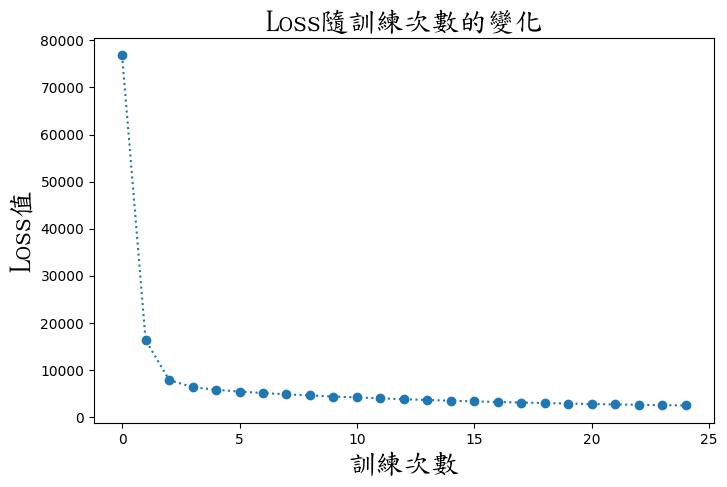

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(LossList,":o")
plt.show()

**比較訓練資料和神經網路的預測房價**



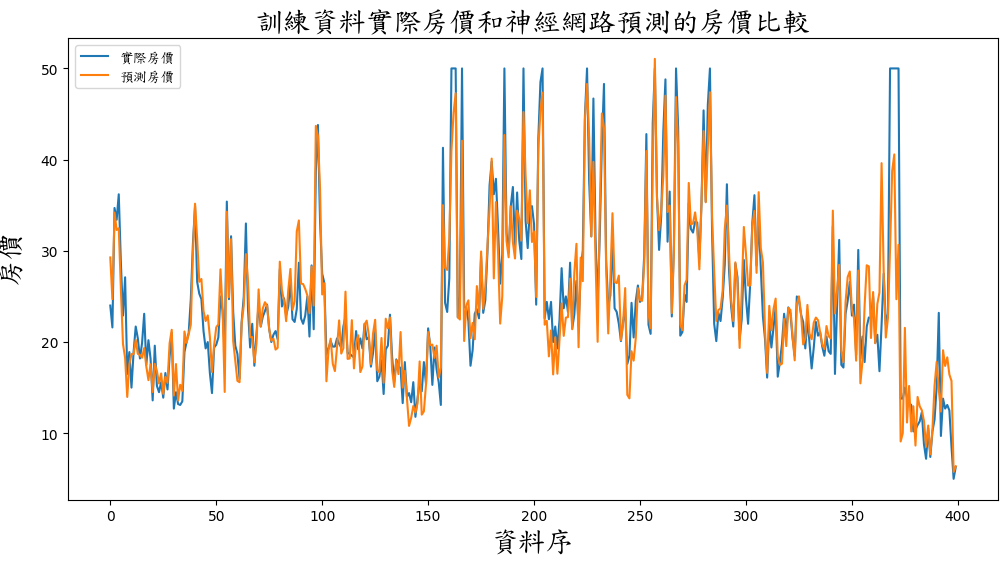

實際房價平均值 [24.3345]
預測值的平均誤差平方根 0.12497527529597022


In [ ]:
plt.figure(figsize=(12,6))
plt.title("訓練資料實際房價和神經網路預測的房價比較",fontproperties=twfont1,fontsize=20)
plt.xlabel("資料序",fontproperties=twfont1,fontsize=20)
plt.ylabel("房價",fontproperties=twfont1,fontsize=20)
plt.plot(mtx_train_y,label="實際房價")
plt.plot(OutputL_Output,label="預測房價")
plt.legend(prop=twfont1)
plt.show()
print("實際房價平均值",mtx_train_y.mean(axis=0))
print("預測值的平均誤差平方根",np.sqrt(Loss)/mtx_train_y.shape[0])

**比較驗證資料實際房價和神經網路的預測房價**

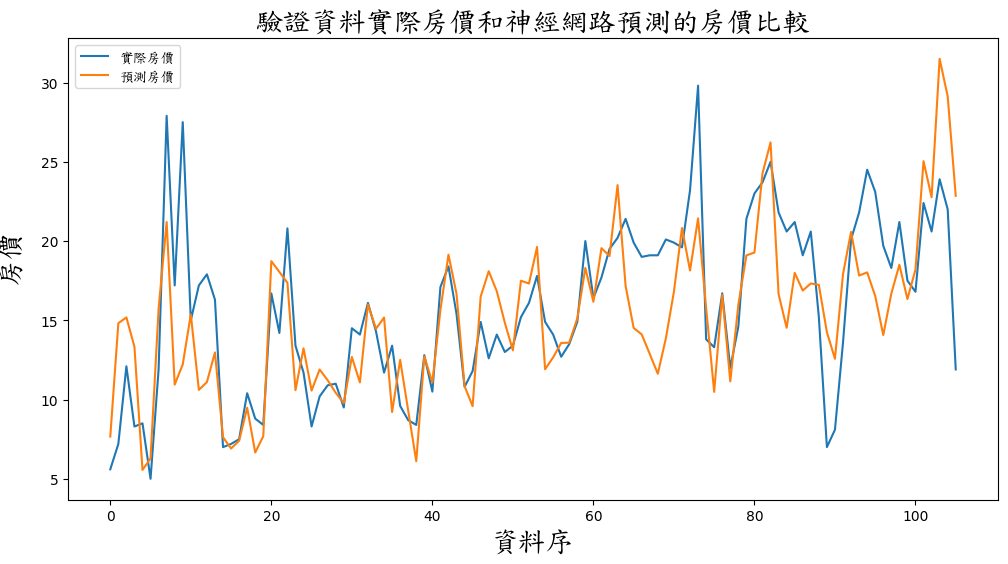

實際房價平均值 [15.73396226]
預測值的平均誤差平方根 0.271984202236263


In [ ]:
plt.figure(figsize=(12,6))
plt.title("驗證資料實際房價和神經網路預測的房價比較",fontproperties=twfont1,fontsize=20)
plt.xlabel("資料序",fontproperties=twfont1,fontsize=20)
plt.ylabel("房價",fontproperties=twfont1,fontsize=20)
_1,_2,OutputL_Output= Forward(mtx_valid_x)
Loss=0.5*np.sum((mtx_valid_y-OutputL_Output)**2)
plt.plot(mtx_valid_y,label="實際房價")
plt.plot(OutputL_Output,label="預測房價")
plt.legend(prop=twfont1)
plt.show()
print("實際房價平均值",mtx_valid_y.mean(axis=0))
print("預測值的平均誤差平方根",np.sqrt(Loss)/mtx_valid_y.shape[0])